**********************************************************************

## 📌 Problem Statement

Customer churn is a critical issue for subscription-based businesses. High churn rates can significantly reduce customer lifetime value and impact overall revenue.

🎯 **Objective:**  
To build a predictive model that accurately identifies whether a customer is likely to churn, based on their demographics, service usage, and account information.

🔍 **Why it matters:**  
By identifying churn-prone customers early, businesses can take targeted retention actions — such as offering personalized incentives or improving customer service.

🧠 **In this project, we will:**

-  Explore and clean the dataset
-  Handle class imbalance using oversampling techniques
-  Train multiple machine learning models (Logistic Regression, Random Forest, etc.)
-  Build a deep learning model for comparison
-  Evaluate model performance using metrics like Accuracy and F1 Score
-  Visualize feature importance and performance comparison

This project demonstrates a full pipeline of data analytics and machine learning applied to a real-world business problem.


## 📊 Dataset Overview

This dataset contains information about a telecom company's customers. Features include demographics, services signed up for, account information, and whether the customer has churned.

We aim to use these features to build predictive models that identify at-risk customers.


************************************************************************

## Import Libraries


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset

data = pd.read_csv('/kaggle/input/telecom-dataset/telco.csv')

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.shape 

(7043, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
if 'customerID' in data.columns:
    data.drop('customerID', axis=1, inplace=True)


# Clean and convert 'TotalCharges' to float
data["TotalCharges"] = data["TotalCharges"].replace(" ","0")
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
data.isnull().sum().sum()

0

In [15]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

data['SeniorCitizen'] = data["SeniorCitizen"].apply(conv)

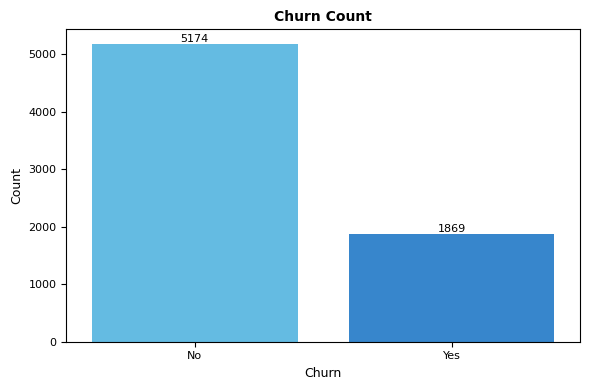

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=data, palette=["#4FC3F7", '#1e88e5'])
ax.bar_label(ax.containers[0], fontsize=8)
plt.title("Churn Count", fontsize=10, weight='bold')
plt.xlabel("Churn", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


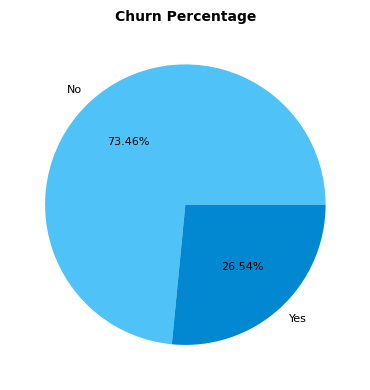

In [17]:
plt.figure(figsize=(6, 4))
gb = data['Churn'].value_counts()
colors = ["#4FC3F7", '#0288D1']
plt.pie(gb, labels=gb.index, autopct="%1.2f%%", colors=colors, textprops={'fontsize': 8})
plt.title("Churn Percentage", fontsize=10, weight='bold')
plt.tight_layout()
plt.show()


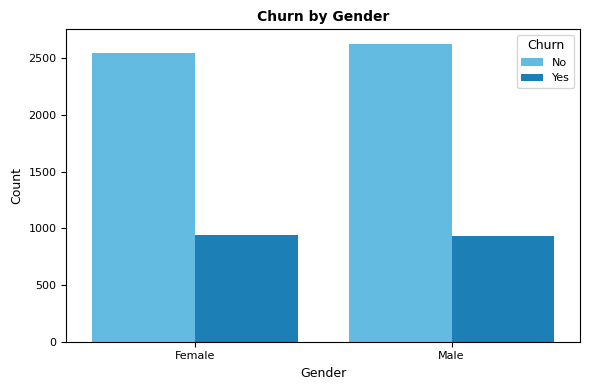

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x="gender", data=data, hue="Churn", palette=["#4FC3F7", '#0288D1'])
plt.title("Churn by Gender", fontsize=10, weight='bold')
plt.xlabel("Gender", fontsize=9)
plt.ylabel("Count", fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title="Churn", fontsize=8, title_fontsize=9)
plt.tight_layout()
plt.show()


In [19]:
value_count_dict = dict()
Categorical=data.select_dtypes(include='object').columns.tolist()

for i in Categorical:
    print(f"{i} column's count values:")
    index, count = data[i].value_counts().index, data[i].value_counts().values
    value_count_dict['value'] = list(index)
    value_count_dict['count'] = list(count)
    value_count_df = pd.DataFrame(value_count_dict)
    
    if value_count_df.shape[0] > 10:
        display(value_count_df.head(10))
    else:
        display(value_count_df)

customerID column's count values:


,value,count
0,7590-VHVEG,1
1,3791-LGQCY,1
2,6008-NAIXK,1
3,5956-YHHRX,1
4,5365-LLFYV,1
5,5855-EIBDE,1
6,8166-ZZTFS,1
7,0129-KPTWJ,1
8,9128-CPXKI,1
9,9509-MPYOD,1


gender column's count values:


,value,count
0,Male,3555
1,Female,3488


SeniorCitizen column's count values:


,value,count
0,no,5901
1,yes,1142


Partner column's count values:


,value,count
0,No,3641
1,Yes,3402


Dependents column's count values:


,value,count
0,No,4933
1,Yes,2110


PhoneService column's count values:


,value,count
0,Yes,6361
1,No,682


MultipleLines column's count values:


,value,count
0,No,3390
1,Yes,2971
2,No phone service,682


InternetService column's count values:


,value,count
0,Fiber optic,3096
1,DSL,2421
2,No,1526


OnlineSecurity column's count values:


,value,count
0,No,3498
1,Yes,2019
2,No internet service,1526


OnlineBackup column's count values:


,value,count
0,No,3088
1,Yes,2429
2,No internet service,1526


DeviceProtection column's count values:


,value,count
0,No,3095
1,Yes,2422
2,No internet service,1526


TechSupport column's count values:


,value,count
0,No,3473
1,Yes,2044
2,No internet service,1526


StreamingTV column's count values:


,value,count
0,No,2810
1,Yes,2707
2,No internet service,1526


StreamingMovies column's count values:


,value,count
0,No,2785
1,Yes,2732
2,No internet service,1526


Contract column's count values:


,value,count
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


PaperlessBilling column's count values:


,value,count
0,Yes,4171
1,No,2872


PaymentMethod column's count values:


,value,count
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


Churn column's count values:


,value,count
0,No,5174
1,Yes,1869


In [20]:
# Set plot style
sns.set(style="whitegrid")

In [21]:
# List of categorical and numerical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

## Data visualization


In [22]:
# Custom count plot with 3-tone professional blue palette
def count_plot(feature, data, ax):
    colors = ['#81D4FA', '#2196F3', '#3F51B5']  # Light Blue, Blue, Royal Blue
    sns.countplot(data=data, x=feature, palette=colors, ax=ax)
    ax.set_title(f'Count Plot of {feature}', fontsize=10, weight='bold')
    ax.set_xlabel(feature, fontsize=9)
    ax.set_ylabel('Count', fontsize=9)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.grid(True, linestyle='--', alpha=0.4)

# Visualize categorical features in subplots
def visualize_categorical_features(categorical_features, data):
    num_features = len(categorical_features)
    cols = 3
    rows = (num_features + cols - 1) // cols  # Ceiling division

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        count_plot(feature, data, axes[i])

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


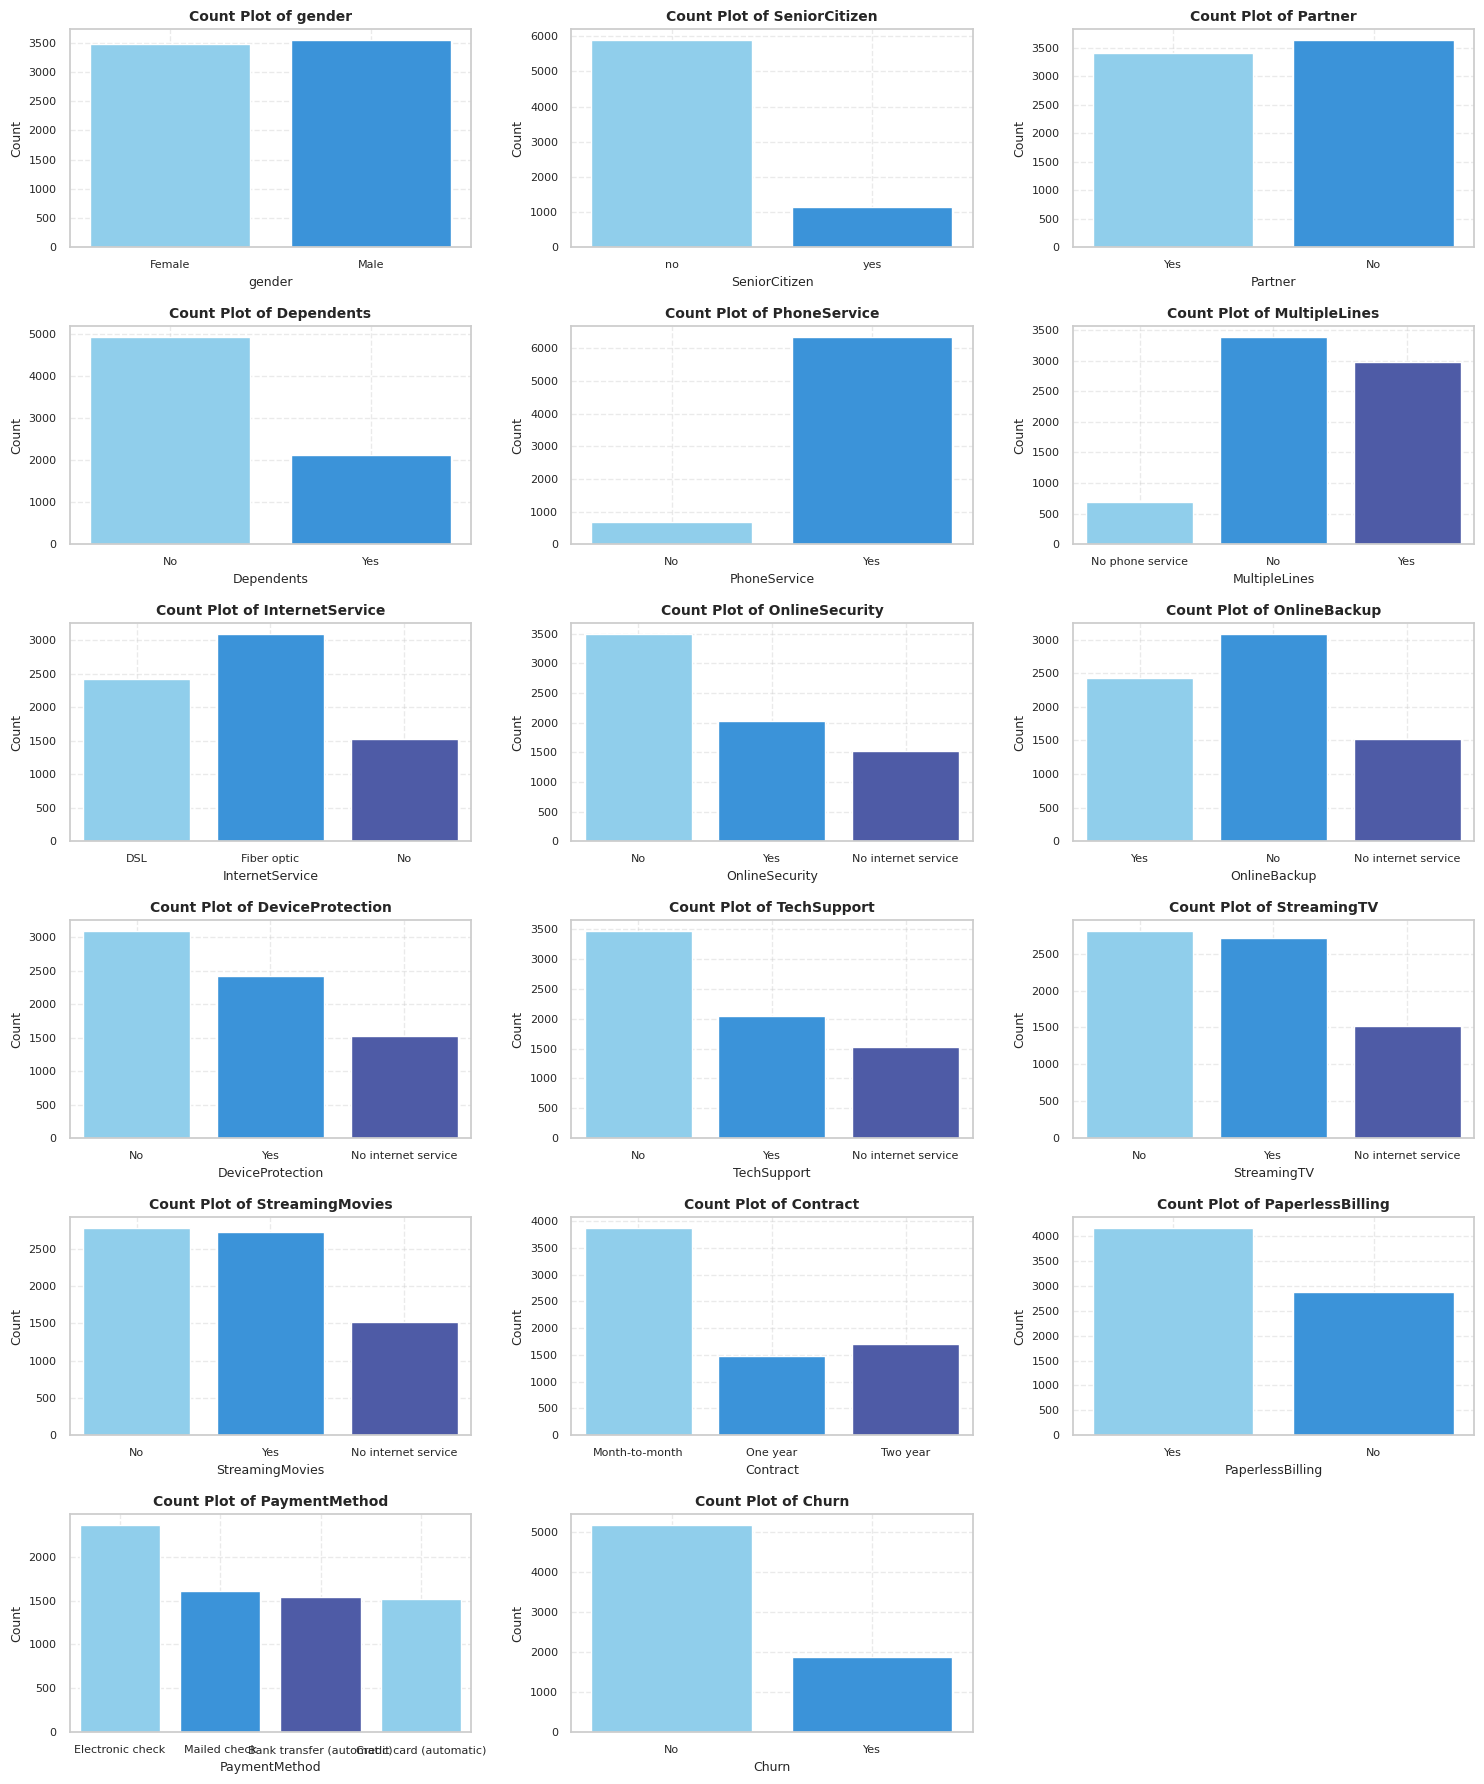

In [23]:
visualize_categorical_features(categorical_features, data)

In [24]:
def dist_plot(feature, data, ax):
    sns.histplot(data[feature], kde=True, color="#1f77b4", ax=ax)  
    ax.set_title(f'Distribution Plot of {feature}', fontsize=12, weight='bold')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Visualize numerical features in subplots
def visualize_numerical_features(numerical_features, data):
    num_features = len(numerical_features)
    cols = 2  # Number of columns in the subplot grid
    rows = (num_features + 1) // cols 

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, feature in enumerate(numerical_features):
        dist_plot(feature, data, axes[i])

    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


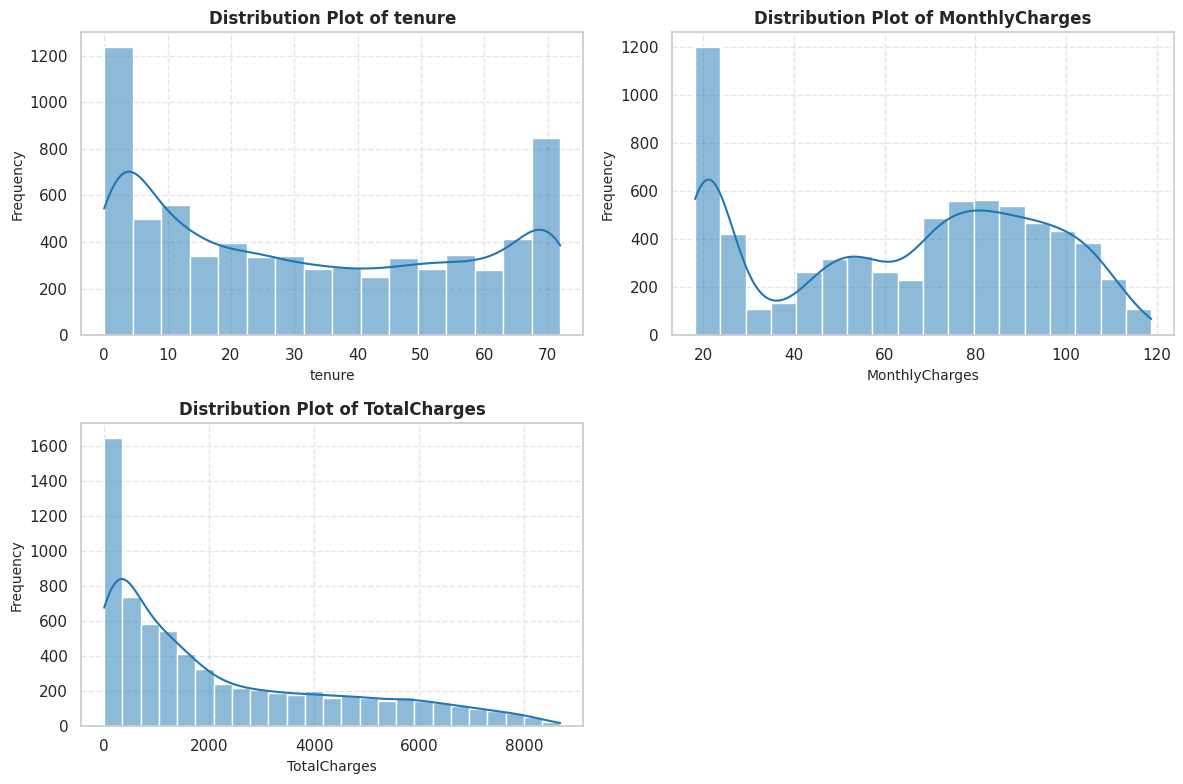

In [25]:
visualize_numerical_features(numerical_features, data)

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [27]:
# Split data into training and testing sets
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

In [28]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and resample
X_resampled, y_resampled = ros.fit_resample(X, y)

from collections import Counter

print("Original class counts:")
print(Counter(y))

print("Oversampled class counts:")
print(Counter(y_resampled))

Original class counts:
Counter({0: 5174, 1: 1869})
Oversampled class counts:
Counter({0: 5174, 1: 5174})


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


## Machine Learning Models


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'\nLogistic Regression Accuracy: {accuracy_log_reg:.2f}')
print(classification_report(y_test, y_pred_log_reg))
print('-' * 80)


Logistic Regression Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1021
           1       0.76      0.83      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070

--------------------------------------------------------------------------------


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
print(f'\nDecision Tree Accuracy: {accuracy_dec_tree:.2f}')
print(classification_report(y_test, y_pred_dec_tree))
print('-' * 80)


Decision Tree Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1021
           1       0.84      0.94      0.89      1049

    accuracy                           0.88      2070
   macro avg       0.89      0.88      0.88      2070
weighted avg       0.89      0.88      0.88      2070

--------------------------------------------------------------------------------


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
print(f'\nRandom Forest Accuracy: {accuracy_rand_forest:.2f}')
print(classification_report(y_test, y_pred_rand_forest))
print('-' * 80)


Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1021
           1       0.87      0.95      0.91      1049

    accuracy                           0.90      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070

--------------------------------------------------------------------------------


In [34]:
from sklearn.svm import SVC

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'\nSupport Vector Machine Accuracy: {accuracy_svc:.2f}')
print(classification_report(y_test, y_pred_svc))
print('-' * 80)


Support Vector Machine Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1021
           1       0.68      0.60      0.64      1049

    accuracy                           0.66      2070
   macro avg       0.66      0.66      0.66      2070
weighted avg       0.66      0.66      0.66      2070

--------------------------------------------------------------------------------


In [35]:
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'\nXGBoost Accuracy: {accuracy_xgb:.2f}')
print(classification_report(y_test, y_pred_xgb))
print('-' * 80)


XGBoost Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1021
           1       0.82      0.91      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070

--------------------------------------------------------------------------------


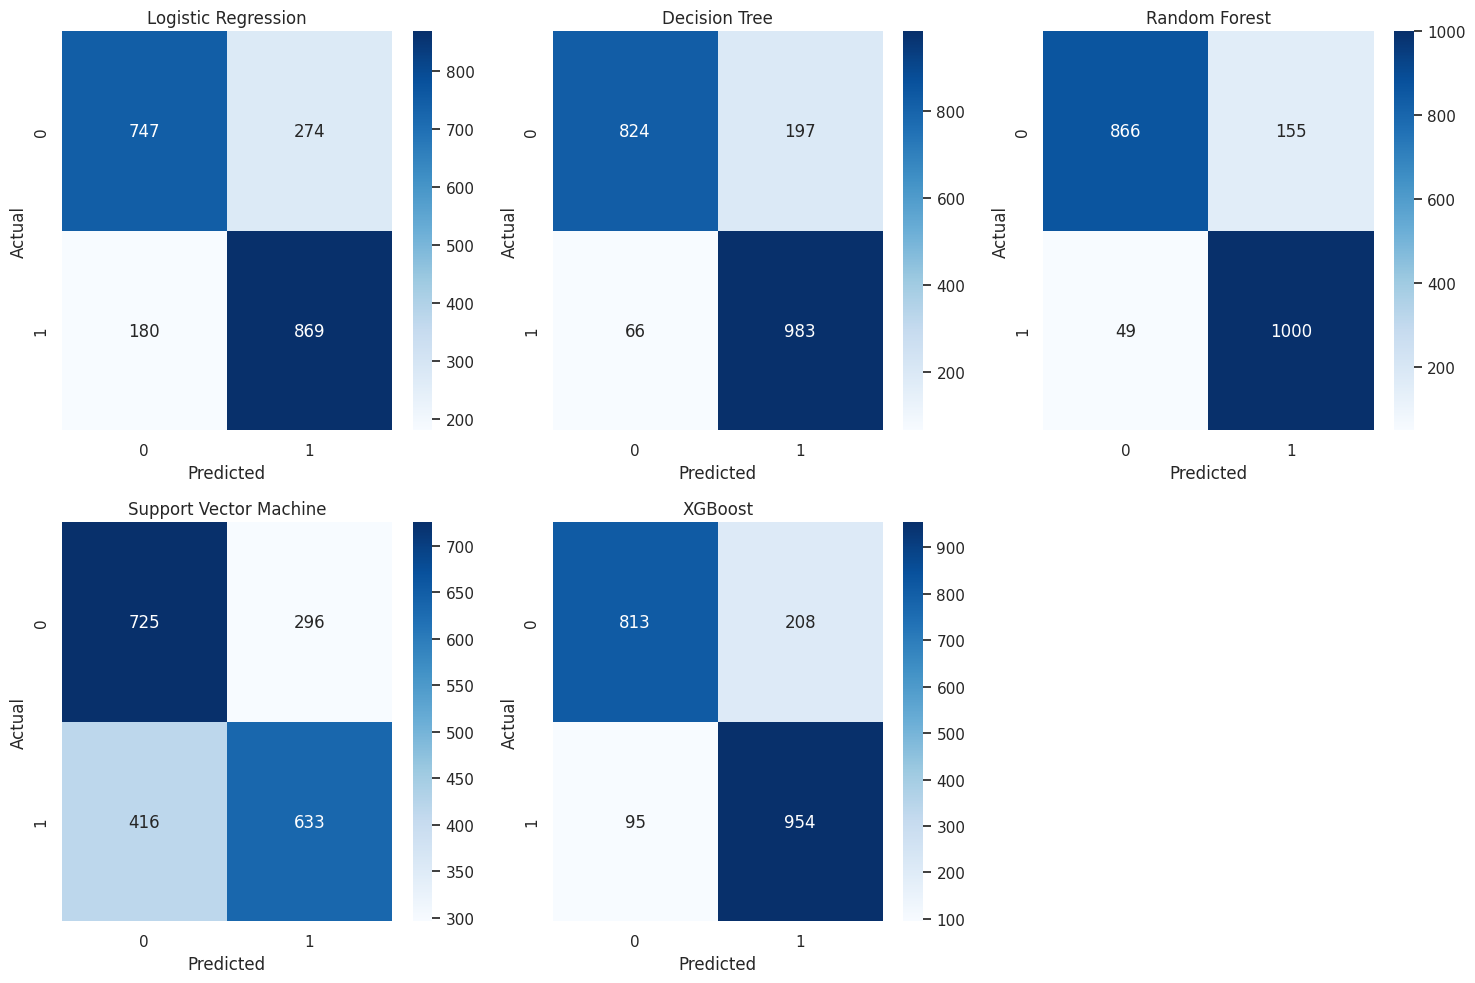

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

# Train the models and get predictions
confusion_matrices = {}
accuracies = {}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    accuracies[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
# Plot the confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, (name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Remove the last empty subplot if there are fewer than 6 models
if len(models) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

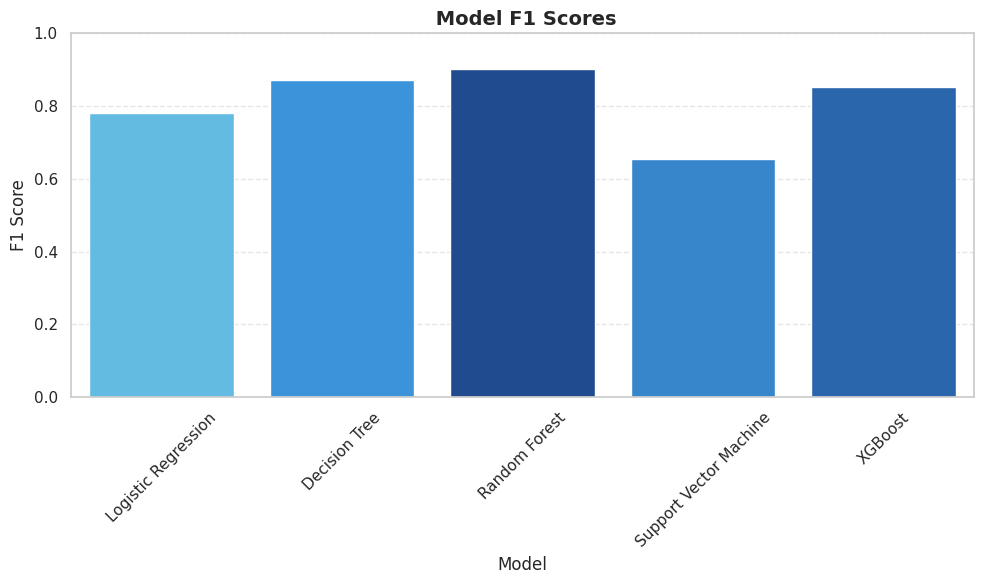

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(f1_scores.keys()),
    y=list(f1_scores.values()),
   palette = [
    "#4FC3F7",  
    "#2196F3",  
    "#0D47A1",  
    "#1E88E5",  
    "#1565C0"  
]
)
plt.title(' Model F1 Scores', fontsize=14, weight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


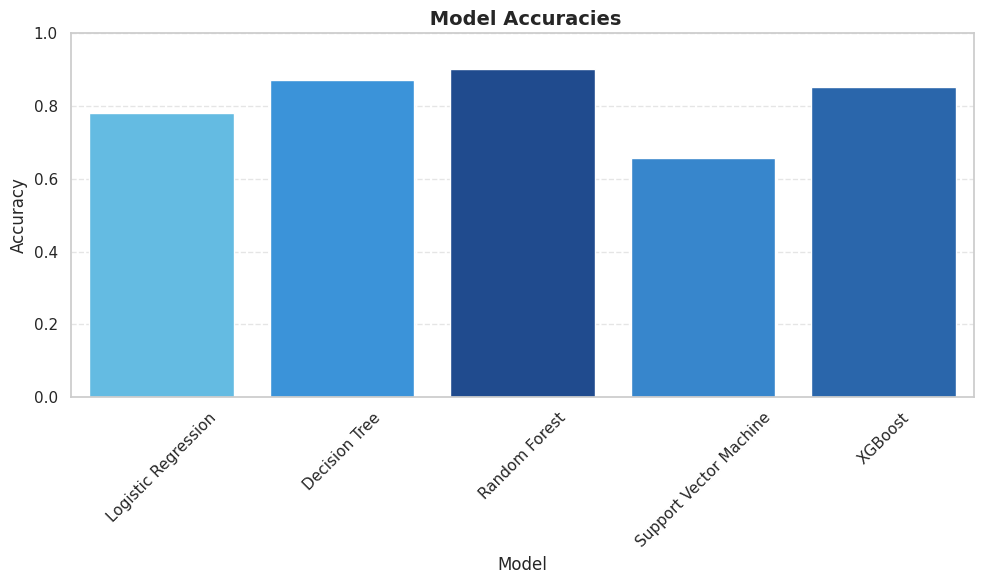

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(accuracies.keys()),
    y=list(accuracies.values()),
    palette = [
    "#4FC3F7",  
    "#2196F3",  
    "#0D47A1",  
    "#1E88E5",  
    "#1565C0"  
]
)
plt.title(' Model Accuracies', fontsize=14, weight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


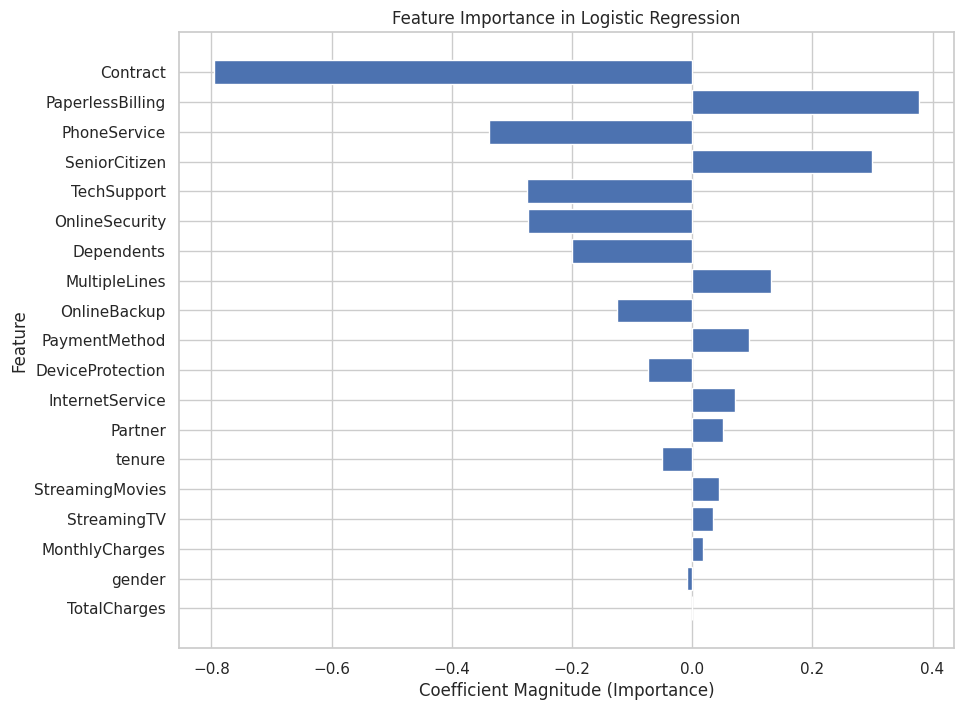

In [39]:
# Feature importance for Logistic Regression
lr = models['Logistic Regression']
feature_names = X_train.columns
coefficients = lr.coef_[0]

# Sort features by importance
sorted_idx = np.argsort(np.abs(coefficients))

plt.figure(figsize=(10, 8))
plt.barh(range(len(coefficients)), coefficients[sorted_idx], align='center')
plt.yticks(range(len(coefficients)), np.array(feature_names)[sorted_idx])
plt.xlabel("Coefficient Magnitude (Importance)")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.show()

## Deep Learning Model


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

def classification_model():
    model = Sequential()
    model.add(Dense(512, input_shape=[19], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model



In [41]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                 patience=5, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.000001)

model = classification_model()

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_test, y_test), 
                    callbacks=[lr_reduction])

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100:.2f}% \nError: {(1-scores[1])*100:.2f}%")

Epoch 1/50
130/130 [==============================] - 5s 13ms/step - loss: 0.5946 - accuracy: 0.6969 - val_loss: 0.5769 - val_accuracy: 0.7034 - lr: 0.0010
Epoch 2/50
130/130 [==============================] - 1s 10ms/step - loss: 0.5607 - accuracy: 0.7189 - val_loss: 0.5520 - val_accuracy: 0.7242 - lr: 0.0010
Epoch 3/50
130/130 [==============================] - 1s 10ms/step - loss: 0.5483 - accuracy: 0.7270 - val_loss: 0.5420 - val_accuracy: 0.7386 - lr: 0.0010
Epoch 4/50
130/130 [==============================] - 1s 10ms/step - loss: 0.5421 - accuracy: 0.7294 - val_loss: 0.5612 - val_accuracy: 0.7005 - lr: 0.0010
Epoch 5/50
130/130 [==============================] - 1s 10ms/step - loss: 0.5318 - accuracy: 0.7347 - val_loss: 0.5358 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 6/50
130/130 [==============================] - 1s 10ms/step - loss: 0.5292 - accuracy: 0.7341 - val_loss: 0.5510 - val_accuracy: 0.7319 - lr: 0.0010
Epoch 7/50
130/130 [==============================] - 1s 10ms/st

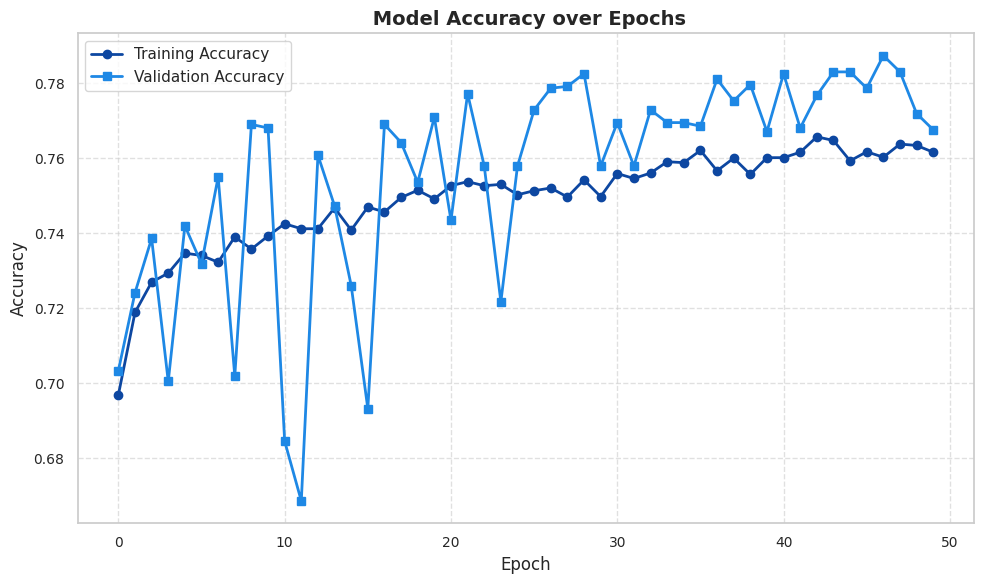

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color= "#0D47A1", marker='o', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#1e88e5', marker='s', linewidth=2)

plt.title(' Model Accuracy over Epochs', fontsize=14, weight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


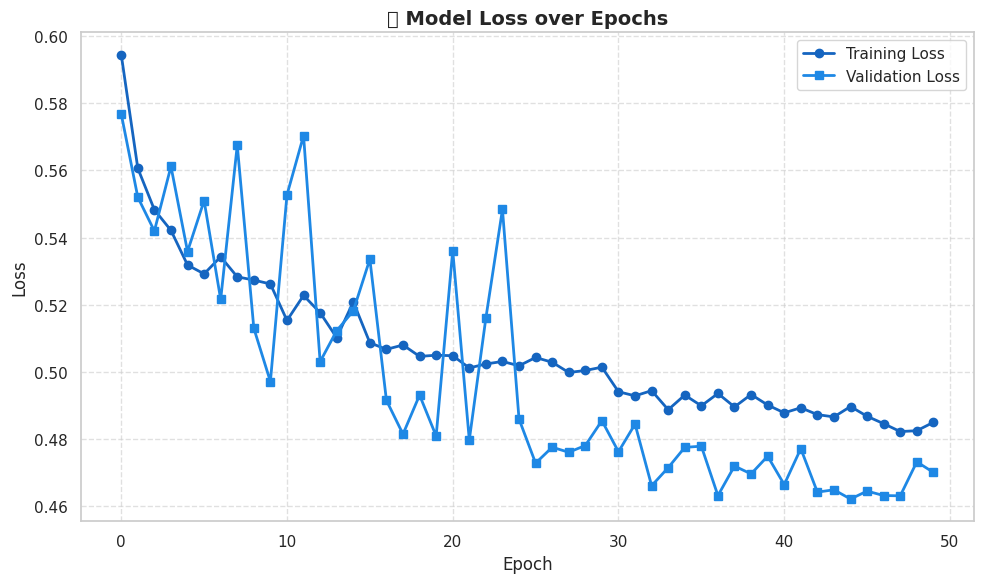

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color="#1565C0", marker='o', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='#1e88e5', marker='s', linewidth=2)

plt.title('📉 Model Loss over Epochs', fontsize=14, weight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


## ✅ Conclusion

This project aimed to predict customer churn using various machine learning and deep learning techniques. After preprocessing the data, addressing class imbalance, and training multiple models, we derived several valuable insights:

📊 **Key Takeaways:**
- The best-performing model (e.g., Logistic Regression or Random Forest).
- Features such as **Contract Type**, **Tenure**, and **Monthly Charges** were among the most influential in predicting churn.
- Oversampling significantly improved model performance by mitigating class imbalance.

🧠 **Business Impact:**
- Identifying high-risk customers enables targeted retention efforts, such as offering long-term contracts or personalized incentives.
- Companies can proactively intervene before customers churn, reducing revenue loss and improving satisfaction.

---

## 📌 Recommendations

- 📞 **Retention Campaigns**: Focus on customers with short tenure and month-to-month contracts.
- 💰 **Offer Discounts**: Provide incentives to customers with high monthly charges to increase satisfaction.
- 📊 **Track Key Metrics**: Monitor churn-prone segments and continuously refine models with new data.

---

## 🚀 Next Steps

- Tune hyperparameters with cross-validation for improved performance.
- Explore ensemble models.
- Deploy the best model as a REST API for real-time churn prediction.
